<a href="https://colab.research.google.com/github/Satish055/Machine_Learning_D/blob/main/Heart_Disease_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HEART DISEASE PREDICTION**

IMPORT NECESSARY LIBRARIES

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

**Data Collection and Processing**

In [3]:
# Loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart_disease_data.csv')

In [5]:
1. # Print fisrt 5 rows of data from dataset using head()
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Print the last 5 rows of data from dataset using tail()
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# Number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [8]:
# Getting the some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Checking the missing values in dataset
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
1.# Statistical Measure about of the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**DATA VISUALIZATION**

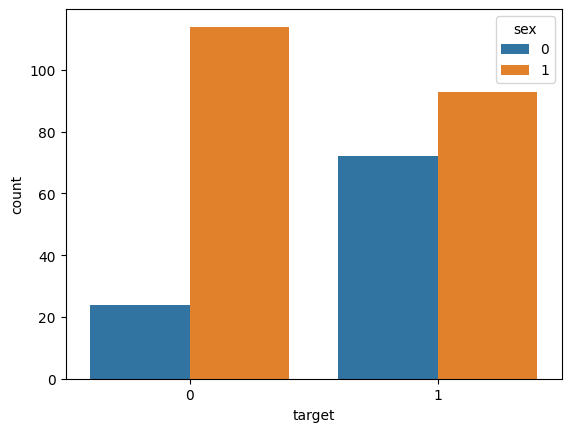

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='target',data=heart_data , hue='sex')
plt.show()

In [14]:
# Checking the distribution of Target Varilables
heart_data['target'].value_counts()

,count
target,
1,165
0,138


1-> Defective Heart

0-> Healthy Heart

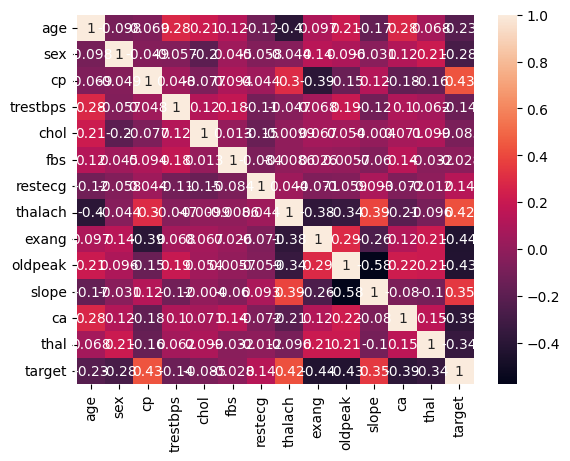

In [12]:
sns.heatmap(heart_data.corr(),annot=True)
plt.show()

**SPLITTING THE DATA SET INTO FEATURES AND TARGET**

```
# This is formatted as code
```



In [19]:
X=heart_data.drop(columns='target',axis=1)
y=heart_data['target']

In [17]:
X.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3


In [20]:
y.sample(5)

,target
274,0
146,1
219,0
41,1
278,0


**SPLITTING THE DATA SET INTO TRAINING AND TEST DATA**

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [22]:
X_train.shape

(242, 13)

In [23]:
X_test.shape

(61, 13)

In [24]:
y_test.shape

(61,)

In [25]:
y_train.shape

(242,)

**Model Training - Logistics Regression**

In [29]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [30]:
# Train the logistic regression model for training data

In [33]:
model.fit(X_train,y_train)

LogisticRegression()

**Model Evalution**

In [37]:
# Accuracy on the training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)
print(f'Accuaracy on training data :{training_data_accuracy}')


Accuaracy on training data :0.8512396694214877


Evalution on Test case data

In [38]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,y_test)
print(f'Accuaracy on Test data :{test_data_accuracy}')


Accuaracy on Test data :0.819672131147541


MODEL EVALUTION USING CINFUSION MATRIX

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,X_test_prediction)
cm

array([[23,  5],
       [ 6, 27]])

In [40]:
cm_train=confusion_matrix(y_train,X_train_prediction)
cm_train

array([[ 85,  25],
       [ 11, 121]])

Buliding a Predictive System

In [46]:
input_data=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)
import numpy as np

# Change the input data to a numpy array
inp_num=np.asarray(input_data)

# Reshape the numpy array as we are predicting for only on instance
inp_reshaped=inp_num.reshape(1,-1)

prediction=model.predict(inp_reshaped)
print(f'Model predicted is :{prediction}-Defective Heart')

Model predicted is :[1]-Defective Heart


In [48]:
inp_num1=(57,0,0,140,241,0,1,123,1,0.2,1,0,3)
inp_num1=np.asarray(inp_num1)
inp_num1=inp_num1.reshape(1,-1)
prediction=model.predict(inp_num1)
print(f'Model predicted is :{prediction}-Healthy Heart')

Model predicted is :[0]-Healthy Heart


In [49]:
if (prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

The Person does not have a Heart Disease
